In [52]:
import pandas as pd
import numpy as np 
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


# Selección con métodos estadísticos 

Sklearn ofrece una selección basada en métodos estadísticos como por ejemplo las F Tests. 
Un enfoque similar a solo considerar aquellas columnas que tienen un valor p (p-value) significativo. 

Este método es sencillo y veloz, pero considera a cada variable como independiente. Es decir no toma en consideración interacciones entre variables.

In [53]:
iris = load_iris()

df = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
)

In [54]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


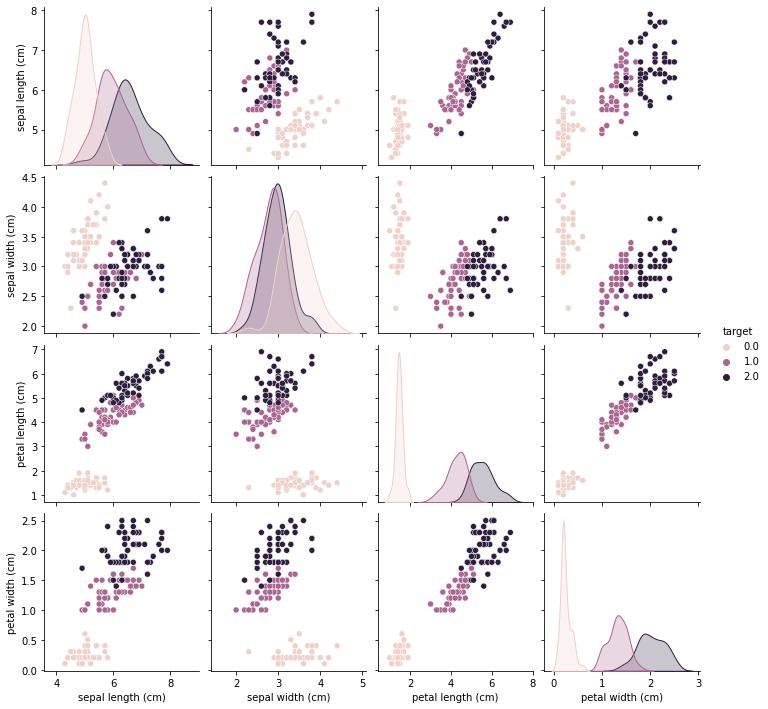

In [30]:
sns.pairplot(
    df, 
    hue="target"
);

In [48]:
X = df[iris['feature_names']]
y = df['target']
k = 2  # Núm variables

selector = SelectKBest(
    f_classif, k=k
)
X_new = selector.fit_transform(X, y)
mask = selector.get_support()  # mask es una lista de boolean con las columnas seleccionadas
col_names = X.columns[mask]  
X_train_df = pd.DataFrame(
    X_new,
    columns=col_names
)
print(f'Columnas seleccionadas: {list(X.columns[mask])}')

Columnas seleccionadas: ['petal length (cm)', 'petal width (cm)']


In [45]:
X_train_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


# Selección con métodos Recursivos

Estos métodos se basan en algoritmos de ML que se ejecutan recursivamente (es decir en una secuencia continua), y selecciona las columnas con mayor relevancia. 
Si el dataset es complejo y masivo, tomará mayor cantidad de tiempo que el método anterior, pero producirá mejores resultados. 

SKlearn ofrece dos alternativas interesantes `SelectFromModel` y `SequentialFeatureSelector`. El segundo siendo más exhaustivo, pero tomará mucho más tiempo. 

Más info aquí: [link](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)

In [50]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()  # podemos escoger cualquier modelo que se adapte al caso
# Creamos el selector en base al modelo que queremos utilizar
selector = SelectFromModel(
    max_features=k,
    estimator=clf, 
)
# mantenemos la sintáxis anterior
X_new = selector.fit_transform(X, y)
mask = selector.get_support()  # mask es una lista de boolean con las columnas seleccionadas
col_names = X.columns[mask]  
X_train_df = pd.DataFrame(
    X_new,
    columns=col_names
)
print(f'Columnas seleccionadas: {list(X.columns[mask])}')

Columnas seleccionadas: ['petal length (cm)', 'petal width (cm)']


In [51]:
X_train_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


# IMB Learn

## OverSampling

In [ ]:
#!pip install imblearn
#!pip install -U threadpoolctl  # permite utilziar SMOTE

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.datasets import fetch_datasets
from imblearn.over_sampling import SMOTE


In [2]:
# Cargamos dataset de Imblearn (ya tiene un desbalance.)
# La primera vez demora un poco ya que descarga el dataset!
data = fetch_datasets()["oil"]

In [3]:
# Data ya tiene division entre las variables predictoras y la variable objetivo.
data

{'data': array([[1.000000e+00, 2.558000e+03, 1.506090e+03, ..., 3.324319e+04,
         6.574000e+01, 7.950000e+00],
        [2.000000e+00, 2.232500e+04, 7.911000e+01, ..., 5.157204e+04,
         6.573000e+01, 6.260000e+00],
        [3.000000e+00, 1.150000e+02, 1.449850e+03, ..., 3.169284e+04,
         6.581000e+01, 7.840000e+00],
        ...,
        [2.020000e+02, 1.400000e+01, 2.514000e+01, ..., 2.153050e+03,
         6.591000e+01, 6.120000e+00],
        [2.030000e+02, 1.000000e+01, 9.600000e+01, ..., 2.421430e+03,
         6.597000e+01, 6.320000e+00],
        [2.040000e+02, 1.100000e+01, 7.730000e+00, ..., 3.782680e+03,
         6.565000e+01, 6.260000e+00]]),
 'target': array([ 1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1,

In [4]:
from collections import Counter

Counter(data['target'])

Counter({1: 41, -1: 896})

In [5]:
# Split training and testing sets
X = data['data'] 
y = data['target'] # target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Modelo Sin Balanceo

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
print('MODELO SIN BALANCEO')
# Imprimimos los resultados del modelo
print (pd.crosstab(y_test,  y_pred,
                   rownames = ['Actual'],
                   colnames = ['Preddición']))

print(f'Accuracy: {round(accuracy_score(y_pred, y_test),3)}')
print("-----------------------")
print("Reporte Detallado: ")

print(classification_report(y_test, y_pred,))

MODELO SIN BALANCEO
Preddición   -1   1
Actual             
-1          265   6
 1           10   1
Accuracy: 0.943
-----------------------
Reporte Detallado: 
              precision    recall  f1-score   support

          -1       0.96      0.98      0.97       271
           1       0.14      0.09      0.11        11

    accuracy                           0.94       282
   macro avg       0.55      0.53      0.54       282
weighted avg       0.93      0.94      0.94       282



/Users/e0449486/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## TÉCNICA 1. RANDOM OVERSAMPLING

In [7]:
# Handle class imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
Counter(y_train_resampled)

Counter({-1: 625, 1: 625})

In [8]:

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
print('MODELO CON BALANCEO')
# Imprimimos los resultados del modelo
print (pd.crosstab(y_test,  y_pred,
                   rownames = ['Actual'],
                   colnames = ['Preddición']))

print(f'Accuracy: {round(accuracy_score(y_pred, y_test),3)}')
print("-----------------------")
print("Reporte Detallado: ")

print(classification_report(y_test, y_pred,))

MODELO CON BALANCEO
Preddición   -1   1
Actual             
-1          230  41
 1            2   9
Accuracy: 0.848
-----------------------
Reporte Detallado: 
              precision    recall  f1-score   support

          -1       0.99      0.85      0.91       271
           1       0.18      0.82      0.30        11

    accuracy                           0.85       282
   macro avg       0.59      0.83      0.60       282
weighted avg       0.96      0.85      0.89       282



/Users/e0449486/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## TÉCNICA 2. SMOTE
El algoritmo SMOTE son las siglas de Synthetic Minority Over-sampling Technique (técnica de sobremuestreo de minorías sintéticas). Es una técnica utilizada para tratar el desequilibrio de clases en conjuntos de datos de aprendizaje automático. En términos sencillos, el desequilibrio de clases se refiere a una situación en la que una clase de un problema de clasificación binaria tiene muchas más muestras que la otra clase.

La idea básica de SMOTE es crear muestras sintéticas para la clase minoritaria interpolando entre las muestras existentes. Funciona de la siguiente manera:

SMOTE selecciona una muestra de la clase minoritaria al azar.
A continuación, selecciona uno de los k vecinos más cercanos de esta muestra, donde k es un parámetro definido por el usuario.
A continuación, genera una muestra sintética tomando una media ponderada de los valores de las características de las dos muestras. Las ponderaciones se determinan mediante un número aleatorio entre 0 y 1.
Este proceso se repite hasta que se haya generado el número deseado de muestras sintéticas.
He aquí un ejemplo para hacerlo más concreto. Supongamos que tenemos un problema de clasificación binaria con dos clases: A y B. La clase A tiene 10 muestras y la clase B tiene 100 muestras. Se trata de un problema grave de desequilibrio de clases, ya que la clase A sólo tiene el 10% de las muestras.

Podemos utilizar SMOTE para crear muestras sintéticas para la clase A. Digamos que establecemos k=5. SMOTE selecciona aleatoriamente una de las 10 muestras de la clase A. A continuación, selecciona uno de los 5 vecinos más cercanos de esta muestra de la clase B. Genera una muestra sintética tomando una media ponderada de los valores de las características de las dos muestras. Este proceso se repite hasta generar el número deseado de muestras sintéticas de la clase A.

El resultado de aplicar SMOTE es un nuevo conjunto de datos en el que la clase minoritaria está sobremuestreada, lo que puede ayudar a mejorar el rendimiento de los algoritmos de aprendizaje automático sensibles al desequilibrio de clases.

Traducción realizada con la versión gratuita del traductor www.DeepL.com/Translator

In [9]:
# Handle class imbalance using SMOTE
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
Counter(y_train_resampled)

Counter({-1: 625, 1: 625})

In [10]:

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
print('MODELO CON BALANCEO')
# Imprimimos los resultados del modelo
print (pd.crosstab(y_test,  y_pred,
                   rownames = ['Actual'],
                   colnames = ['Preddición']))

print(f'Accuracy: {round(accuracy_score(y_pred, y_test),3)}')
print("-----------------------")
print("Reporte Detallado: ")

print(classification_report(y_test, y_pred,))

MODELO CON BALANCEO
Preddición   -1   1
Actual             
-1          235  36
 1            2   9
Accuracy: 0.865
-----------------------
Reporte Detallado: 
              precision    recall  f1-score   support

          -1       0.99      0.87      0.93       271
           1       0.20      0.82      0.32        11

    accuracy                           0.87       282
   macro avg       0.60      0.84      0.62       282
weighted avg       0.96      0.87      0.90       282



/Users/e0449486/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
